In [5]:
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt

In [6]:
(train_data, train_targets), (test_data, test_targets) =\
                            tf.keras.datasets.boston_housing.load_data()
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


In [15]:
# Подготовка данных
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std


# Конструирование модели
def build_model():
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(64, activation='relu', \
                            input_shape=(train_data.shape[1],)),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [20]:
# Перекрёстная проверка
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

for i in range(k):
  print('Обработка блока номер ', i+1)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i + 1) * num_val_samples:]],
       axis=0
  )
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i + 1) * num_val_samples:]],
       axis=0
  )

  model = build_model()
  history = model.fit(partial_train_data,
            partial_train_targets,
            epochs=num_epochs,
            batch_size=1,
            verbose=0)
  mae_history = history.history['mae']
  all_mae_histories.append(mae_history)

print(all_mae_histories)
print(np.mean(all_mae_histories))

Обработка блока номер  1
Обработка блока номер  2
Обработка блока номер  3
Обработка блока номер  4
[[10.450540542602539, 3.737234115600586, 3.063505172729492, 2.7631802558898926, 2.6739909648895264, 2.6125235557556152, 2.426764726638794, 2.4449424743652344, 2.4004273414611816, 2.383126974105835, 2.315796136856079, 2.2962865829467773, 2.290174722671509, 2.300840377807617, 2.247211456298828, 2.176323413848877, 2.1382288932800293, 2.142268180847168, 2.1373636722564697, 2.143754482269287, 2.119739055633545, 2.100696325302124, 2.0400021076202393, 2.081131935119629, 2.005108118057251, 1.9565114974975586, 1.9842418432235718, 1.9681364297866821, 1.9332038164138794, 1.8707900047302246, 1.9380125999450684, 1.9263136386871338, 1.922656774520874, 1.8629740476608276, 1.865734577178955, 1.8254354000091553, 1.9051074981689453, 1.7772283554077148, 1.8226385116577148, 1.8126825094223022, 1.7902320623397827, 1.7800867557525635, 1.7910927534103394, 1.7537217140197754, 1.706720232963562, 1.72805106639862

[10.896149396896362, 3.7793091535568237, 3.0576010942459106, 2.7642090916633606, 2.583476185798645, 2.4907017946243286, 2.377481520175934, 2.3497208952903748, 2.2783876061439514, 2.231178879737854, 2.2260085940361023, 2.1737701892852783, 2.0997117161750793, 2.1506389379501343, 2.119543731212616, 2.0543538630008698, 2.0225593745708466, 2.0436109602451324, 2.026760369539261, 1.9722209572792053, 1.9654036164283752, 1.972765028476715, 1.9247140288352966, 1.9252650737762451, 1.9187119901180267, 1.8711904287338257, 1.8716666102409363, 1.867828607559204, 1.83221235871315, 1.838439017534256, 1.8286927044391632, 1.8117244839668274, 1.8147553205490112, 1.7742135524749756, 1.7679032385349274, 1.7376869320869446, 1.7374285459518433, 1.7469368278980255, 1.7240841686725616, 1.7206105887889862, 1.7100832164287567, 1.7067319750785828, 1.6856414675712585, 1.6620590090751648, 1.6623750925064087, 1.6420328617095947, 1.6316291689872742, 1.6080457866191864, 1.6322804987430573, 1.6176855862140656, 1.6052387

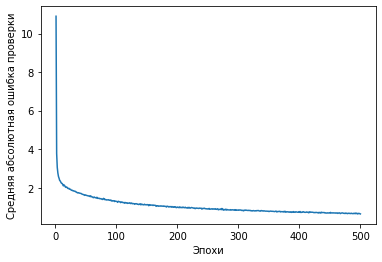

In [32]:
ave_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]
print(ave_mae_history)

plt.plot(range(1, len(ave_mae_history) + 1), ave_mae_history)
plt.xlabel('Эпохи')
plt.ylabel('Средняя абсолютная ошибка проверки')
plt.show()

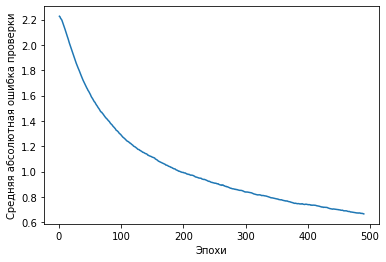

In [22]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(ave_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Эпохи')
plt.ylabel('Средняя абсолютная ошибка проверки')
plt.show()

In [34]:
model = build_model()
history = model.fit(train_data,
                    train_targets,
                    epochs = 80,
                    batch_size=16,
                    verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)
print(test_mse_score)

4/4 [==============================] - 0s 4ms/step - loss: 17.6259 - mae: 2.6084
2.6083877086639404
17.625871658325195
